In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import fisher_exact

In [33]:
# load your data
data_full = pd.read_csv('../merged_data/full_info_dataframe.csv', sep=",")

/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_27862/2023270316.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv('../merged_data/full_info_dataframe.csv', sep=",")


### Completition rate

In [19]:
# Filter to only rows where process_step is 'confirm'
confirm_visits = data_full[data_full['process_step'] == 'confirm']

# Drop duplicates to ensure each visitor is counted once
confirm_unique_visitors = confirm_visits[['visitor_id', 'variation']].drop_duplicates()

# Group by Variation and count
finished_counts = confirm_unique_visitors.groupby('variation')['visitor_id'].nunique()

print(finished_counts)

variation
Control    15566
Test       19505
Name: visitor_id, dtype: int64


### Completed & total count

In [35]:
# Completed count: Test Group & Control Group
completed_test = (confirm_unique_visitors['variation'] == 'Test').sum()
print(finished_test_user)
completed_control = (confirm_unique_visitors['variation'] == 'Control').sum()
print(finished_control_user)

# Total count: Test Group & Control Group
total_test = (data_full['variation'] == 'Test').sum()
print(total_test)
total_control = (data_full['variation'] == 'Control').sum()
print(total_control)

19505
15566
176698
140536


### Z-Test

In [36]:
import statsmodels.api as sm

# Prepare the data
successes = [completed_test, completed_control]
nobs = [total_test, total_control]

# Run the one-sided two-proportion z-test
z_stat, p_value = sm.stats.proportions_ztest(successes, nobs, alternative='larger')

# Output the results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: The new design significantly improves completion rate.")
else:
    print("❌ Fail to reject the null hypothesis: No significant improvement with the new design.")

Z-statistic: -0.3351
P-value: 0.6312
❌ Fail to reject the null hypothesis: No significant improvement with the new design.


### 5% Visualization

Completion Rate (Control Group): 0.1108 or 11.08%
Completion Rate (Test Group): 0.1104 or 11.04%


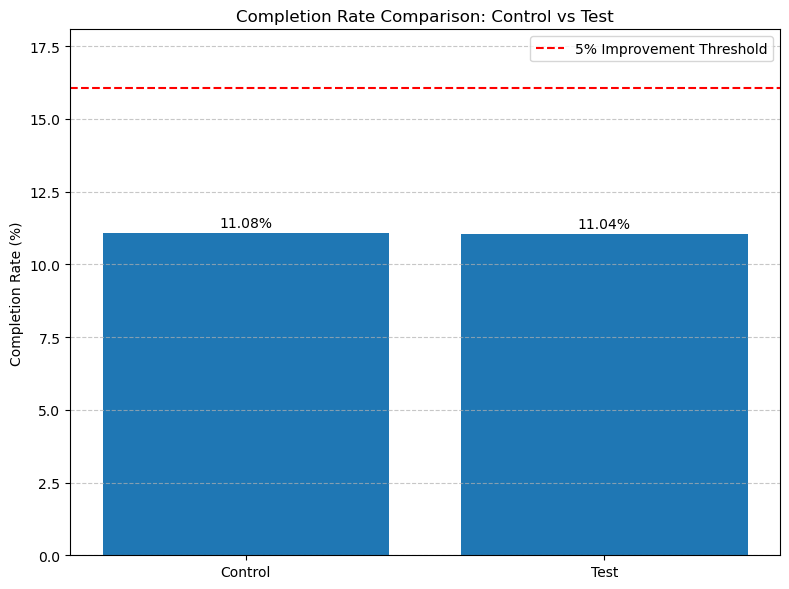

In [37]:
import matplotlib.pyplot as plt

# Completion rate for Control group
completion_rate_control = completed_control / total_control

# Show result as a percentage
print(f"Completion Rate (Control Group): {completion_rate_control:.4f} or {completion_rate_control * 100:.2f}%")

# Completion rate for Control group
completion_rate_test = completed_test / total_test

# Show result as a percentage
print(f"Completion Rate (Test Group): {completion_rate_test:.4f} or {completion_rate_test * 100:.2f}%")

# Define data for visualization
labels = ['Control', 'Test']
completion_rates = [completion_rate_control * 100, completion_rate_test * 100]
threshold = completion_rate_control * 100 + 5  # 5% increase over control

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, completion_rates)

# Add threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label='5% Improvement Threshold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.1, f'{height:.2f}%', ha='center', va='bottom')

# Chart formatting
plt.title('Completion Rate Comparison: Control vs Test')
plt.ylabel('Completion Rate (%)')
plt.legend()
plt.ylim(0, max(threshold + 2, max(completion_rates) + 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Further Hypothesis Testing

### Chi-Square Test

In [ ]:
data = np.array([
    [finished_test_user, total_test_user],  # Test: 240 completions, 160 non-completions
    [finished_control_user, total_control_user]   # Control: 200 completions, 200 non-completions
])

# Run chi-square test
chi2, p, dof, expected = st.chi2_contingency(data)

# Results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

alpha = 0.05
if p < alpha:
    print("✅ Reject the null hypothesis: Completion rate is associated with group (Test vs Control).")
else:
    print("❌ Fail to reject the null hypothesis: No significant association between group and completion.")


Chi-square statistic: 0.0866
P-value: 0.7686
❌ Fail to reject the null hypothesis: No significant association between group and completion.


### Fisher’s Exact Test

In [ ]:
table = [
    [completed_test, total_test],
    [completed_control, total_control]
]

# Run Fisher's Exact Test (only works on 2x2)
odds_ratio, p_value = fisher_exact(table, alternative='greater')  # Use 'greater' for one-tailed

print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: The new design significantly improved the completion rate.")
else:
    print("❌ Fail to reject the null hypothesis: No significant improvement in completion rate.")


Odds Ratio: 0.9966
P-value: 0.6201
❌ Fail to reject the null hypothesis: No significant improvement in completion rate.
